In [84]:
projectdir = "C:/Users/Arman Angaji/OneDrive - Universität zu Köln/Dokumente/Uni-Köln/Masterarbeit/Workspace/Julia_Master/MasterProject_Julia/"
using Pkg; Pkg.activate(projectdir)

using DataFrames, StatsBase, Plots, Statistics, LaTeXStrings, Interact, LsqFit, CSV, Blink, Pipe, ProgressMeter, StatsPlots, Distributed, Roots
pyplot()

try 
    Turnover
catch e
    include(projectdir*"Turnover/Turnover.jl")
    include(projectdir*"Turnover/test.jl")
    using .Turnover
end
try SeqDataFormatting
catch e
    include(projectdir*"experimental_data/SeqDataFormatting.jl")
    using .SeqDataFormatting
end

import TumorGrowth
include(projectdir*"distribution_functions.jl")
include(projectdir*"simulated_tumors/path_format.jl")
include(projectdir*"Turnover/utility.jl")
include(projectdir*"SamplingAnalysis/plot_funcs.jl")
plot(size=(1,1))

  Activating environment at `C:\Users\Arman Angaji\OneDrive - Universität zu Köln\Dokumente\Uni-Köln\Masterarbeit\Workspace\Julia_Master\MasterProject_Julia\Project.toml`


# Load data

In [3]:
tumorinfo = dir_info_mutations(projectdir*"/simulated_tumors/2d/bulk/")
filter!(x-> x.N == 10000 && x.μ == 0.2 && x.d in 0.:0.2:0.8, tumorinfo)
for x in groupby(tumorinfo, :d)
    print("d=",first(x.d), ": ", nrow(x), ", ")
end

d=0.0: 10, d=0.2: 34, d=0.4: 34, d=0.6: 42, d=0.8: 33, 

In [5]:
filter!(r->r.N==10000 && r.ρ == Inf && r.d in 0.0:0.2:0.8 && r.μ == 0.2 && r.dim==2, tumorinfo)
tumorinfo.tumor = @showprogress pmap(TumorGrowth.data_import, tumorinfo.tumorpath)
tumorinfo.mutations = @showprogress pmap(TumorGrowth.data_import, tumorinfo.mutationspath)
;

Progress: 100%|█████████████████████████████████████████| Time: 0:08:25
Progress: 100%|█████████████████████████████████████████| Time: 0:01:22


# Full single-cell set

Progress: 100%|█████████████████████████████████████████| Time: 0:00:05


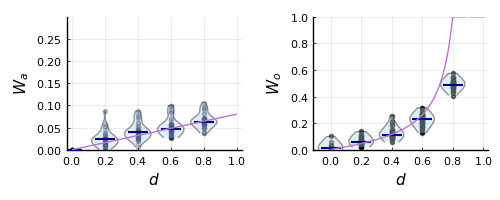

In [56]:
Nthresh = 500
ds, Wa, Wo = get_turnover(tumorinfo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh,
    tumor_sample_func = df -> df)
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


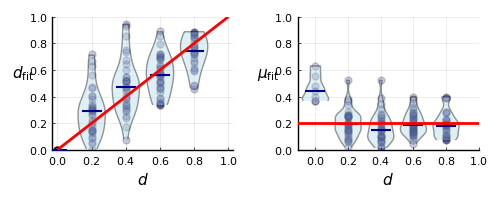

In [57]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


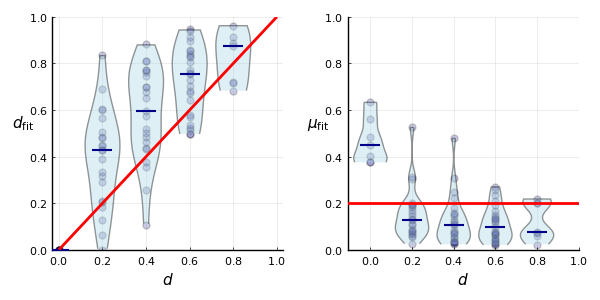

In [172]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph=10_000, Nthresh_estr=10_000, Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2)

> **use known tumor size N at birth**

Progress: 100%|█████████████████████████████████████████| Time: 0:00:24


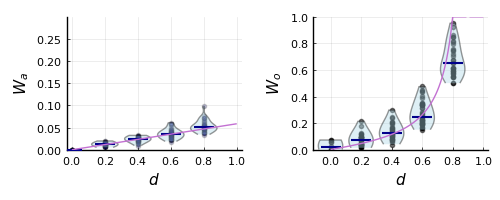

In [53]:
Nthresh_orph , Nthresh_estr = 5000, 500
ds, Wa, Wo = get_turnover(tumorinfo; useknown_N = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


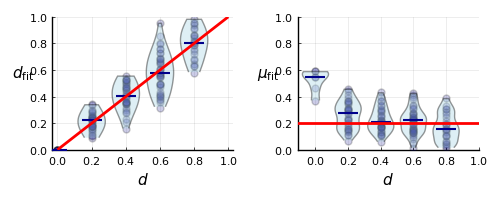

In [54]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, Wa, Wo)
mask = .!ismissing.(mufits)
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:01:13


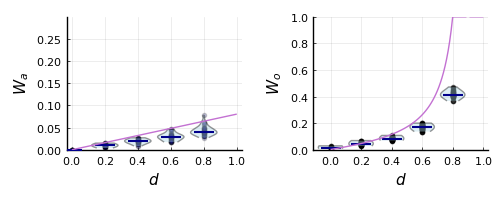

In [55]:
Nthresh_orph , Nthresh_estr = 7000, 5000
ds, Wa, Wo = get_turnover(tumorinfo; useknown_N = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh, Nthresh_estr=Nthresh, mu=0.2, size=(500,200))

> **use known time T at birth**

Progress: 100%|█████████████████████████████████████████| Time: 0:00:13


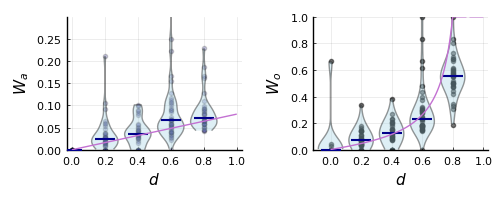

In [49]:
Nthresh_orph , Nthresh_estr = 500, 500
ds, Wa, Wo = get_turnover(tumorinfo; useknown_T = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


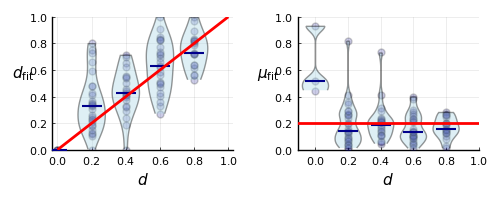

In [36]:
ds, dfits, mufits = infer_params( tumorinfo[mask,:]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, Wa, Wo)
mask_fit = .!ismissing.(mufits)
plot_infresult_violin(ds[mask_fit], dfits[mask_fit], mufits[mask_fit]; mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:03:02


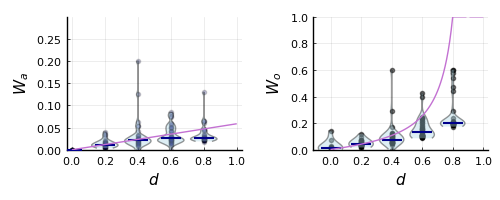

In [52]:
Nthresh_orph , Nthresh_estr = 5000, 5000
ds, Wa, Wo = get_turnover(tumorinfo; useknown_T = true, Nthresh_orph, Nthresh_estr,
    tumor_sample_func = df -> df)
mask = .!(isnan.(Wo))
ds, Wa, Wo = ds[mask], Wa[mask], Wo[mask]
plot_turnover_violin(ds, Wa, Wo; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

# Spatial sampling

In [153]:
Nthresh_orph, Nthresh_estr, samplecutoff= 400, 100, 1/3
samplingparams = (n = 285, cells_per_sample = 0)

ds, Wa, Wo = get_turnover(tumorinfo; 
    useknown_N = false,
    useknown_T = false,
    Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr,
    tumor_sample_func = df -> begin
        samples, sampletumor = TumorGrowth.multi_region_sequencing(df; samplingparams...)
        for row in eachrow(sampletumor)
            mask = row.frequencies .> samplecutoff
            row.mutations, row.frequencies = row.mutations[mask], row.frequencies[mask]
        end
        sampletumor
    end,
    mut_freqs_func = TumorGrowth.sampletumor_mfreqs,
#     subsample_func = df -> SeqDataFormatting.subsample(df; nmuts = 30, cols=[:mutations])
    
);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:49


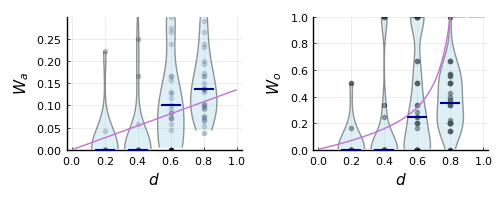

In [105]:
mask = @. !isnan(Wo) * !isnan(Wa)
plot_turnover_violin(ds[mask], Wa[mask], Wo[mask]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


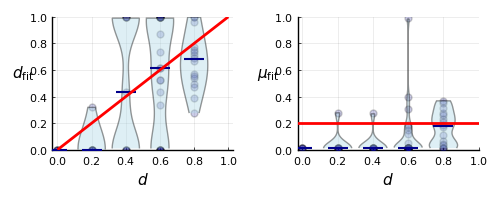

In [113]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = [!ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits,mufits)]
p = plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

> Nthresh_orph, Nthresh_estr, samplecutoff= 40, 20, 1/2 <br>
> samplingparams = (n = 285, cells_per_sample = 20)

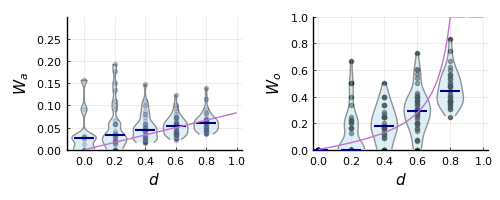

In [154]:
mask = @. !isnan(Wo) * !isnan(Wa)
plot_turnover_violin(ds[mask], Wa[mask], Wo[mask]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

In [157]:
Nthresh_orph_infer, Nthresh_estr_infer = Nthresh_orph, Nthresh_estr
Nthresh_orph_infer, Nthresh_estr_infer = Nthresh_orph*10, Nthresh_estr*10

(4000, 1000)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


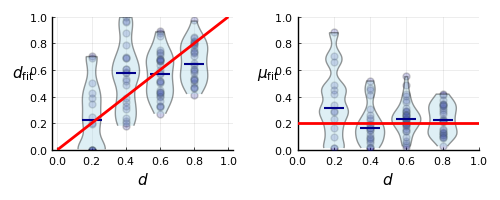

In [156]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph = Nthresh_orph_infer, Nthresh_estr = Nthresh_estr_infer, Wa, Wo)
mask = [!ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits,mufits)]
p = plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


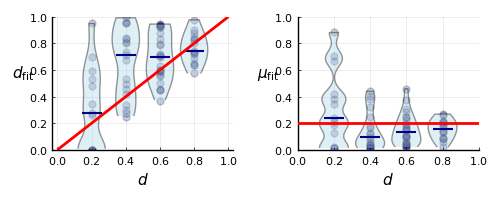

In [158]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph = Nthresh_orph_infer, Nthresh_estr = Nthresh_estr_infer, Wa, Wo)
mask = [!ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits,mufits)]
p = plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

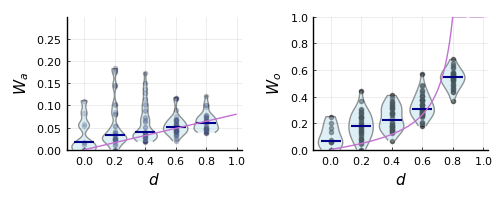

In [68]:
mask = @. !isnan(Wo) * !isnan(Wa)
plot_turnover_violin(ds[mask], Wa[mask], Wo[mask]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


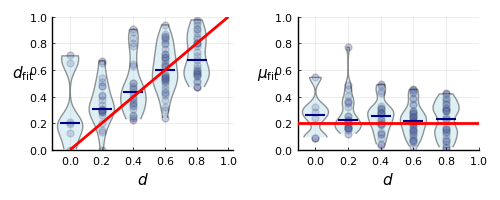

In [70]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = [!ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits,mufits)]
p = plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

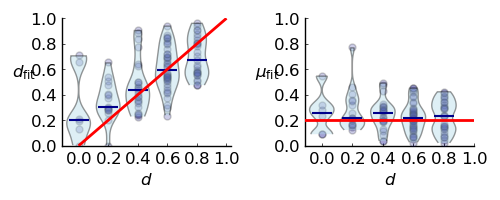

In [77]:
let data = include("turnover_data/inference_spatialdata_results.jl")[end]
    ds_, dfits_, mufits_ = data.ds, data.dfits, data.mufits
    mask = .!ismissing.(mufits_)
    plot_infresult_violin(ds_[mask], dfits_[mask], mufits_[mask]; mu=0.2, size=(500,200))
    plot!( size=(500,200), xlab=L"d", grid=false, guidefont = (12), tickfont = (12), legendfont=(12))
end

In [83]:
# savefig("Turnover/turnover_plots/inference/inference_spatial_N500_n285_mu_violin_defence.png")

> Nthresh_orph, Nthresh_estr, samplecutoff= 500, 500, 1/3 <br>
> samplingparams = (n = 285, cells_per_sample = 20)

**use known tumor size N at birth**

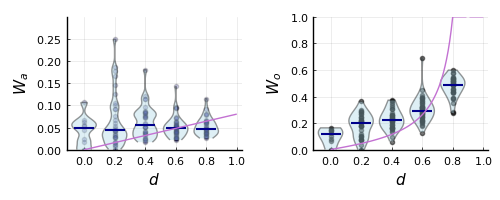

In [80]:
mask = @. !isnan(Wo) * !isnan(Wa)
plot_turnover_violin(ds[mask], Wa[mask], Wo[mask]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


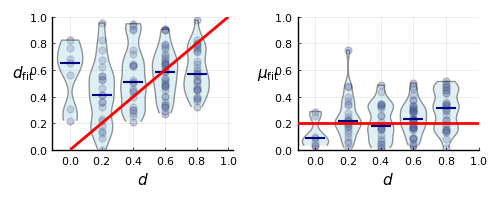

In [87]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = [ !ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits, mufits)]
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))

> **use known time T at birth**

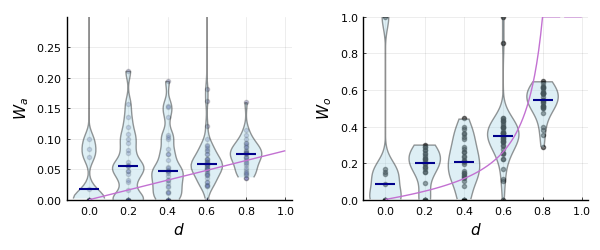

In [191]:
mask = .!isnan.(Wo)
plot_turnover_violin(ds[mask], Wa[mask], Wo[mask]; Nthresh_orph=Nthresh_orph, Nthresh_estr=Nthresh_estr, mu=0.2, size=(500,200))

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


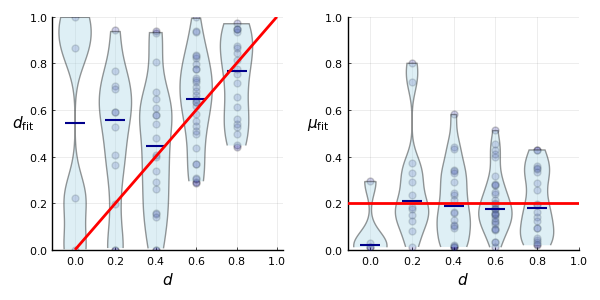

In [192]:
ds, dfits, mufits = infer_params( tumorinfo; Nthresh_orph, Nthresh_estr, Wa, Wo)
mask = [ !ismissing(m) && !isnan(m) && !ismissing(d) && !isnan(d) for (d,m) in zip(dfits, mufits)]
plot_infresult_violin(ds[mask], dfits[mask], mufits[mask]; mu=0.2, size=(500,200))